In [18]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import tqdm

import sys
sys.path.append("/n/home12/cfpark00/ML/tools")

import niceplots

import importlib
importlib.reload(niceplots)

niceplots.apply_global_settings()

In [43]:
figdir="./figures"
prefix="v5_8"
sft_path="./data/sft/v5/toy-multistep-v5-8/"
rl_path="./data/rl/v5_8/"
temperatures=np.array([0.025,0.05,0.1,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0])

#
lw=4

In [27]:
sft_ckpts=glob.glob(sft_path+"/checkpoint-*")
rl_ckpts=glob.glob(rl_path+"/checkpoint-*")
sft_ckpts.sort(key=lambda x: int(x.split("-")[-1]))
rl_ckpts.sort(key=lambda x: int(x.split("-")[-1]))
sft_steps=np.array([int(x.split("-")[-1]) for x in sft_ckpts])
rl_steps=np.array([int(x.split("-")[-1]) for x in rl_ckpts])

In [28]:
#sft acc
sft_train_corrects=[]
sft_train_rl_corrects=[]
sft_test_corrects=[]
for sft_ckpt in sft_ckpts:
    sft_eval_data=torch.load(sft_ckpt+"/eval_data_t.pt",weights_only=False)
    for temperature in temperatures:
        corrects_train=sft_eval_data["train"]['corrects_temp'][str(temperature)]
        corrects_train_rl=sft_eval_data["train_rl"]['corrects_temp'][str(temperature)]
        corrects_test=sft_eval_data["test"]['corrects_temp'][str(temperature)]
        sft_train_corrects.append(corrects_train.astype(np.float32).mean(-1))
        sft_train_rl_corrects.append(corrects_train_rl.astype(np.float32).mean(-1))
        sft_test_corrects.append(corrects_test.astype(np.float32).mean(-1))
sft_train_corrects=np.array(sft_train_corrects).reshape(sft_steps.shape[0],len(temperatures),-1)
sft_train_rl_corrects=np.array(sft_train_rl_corrects).reshape(sft_steps.shape[0],len(temperatures),-1)
sft_test_corrects=np.array(sft_test_corrects).reshape(sft_steps.shape[0],len(temperatures),-1)
sft_train_corrects.shape,sft_train_rl_corrects.shape,sft_test_corrects.shape

((20, 13, 512), (20, 13, 128), (20, 13, 512))

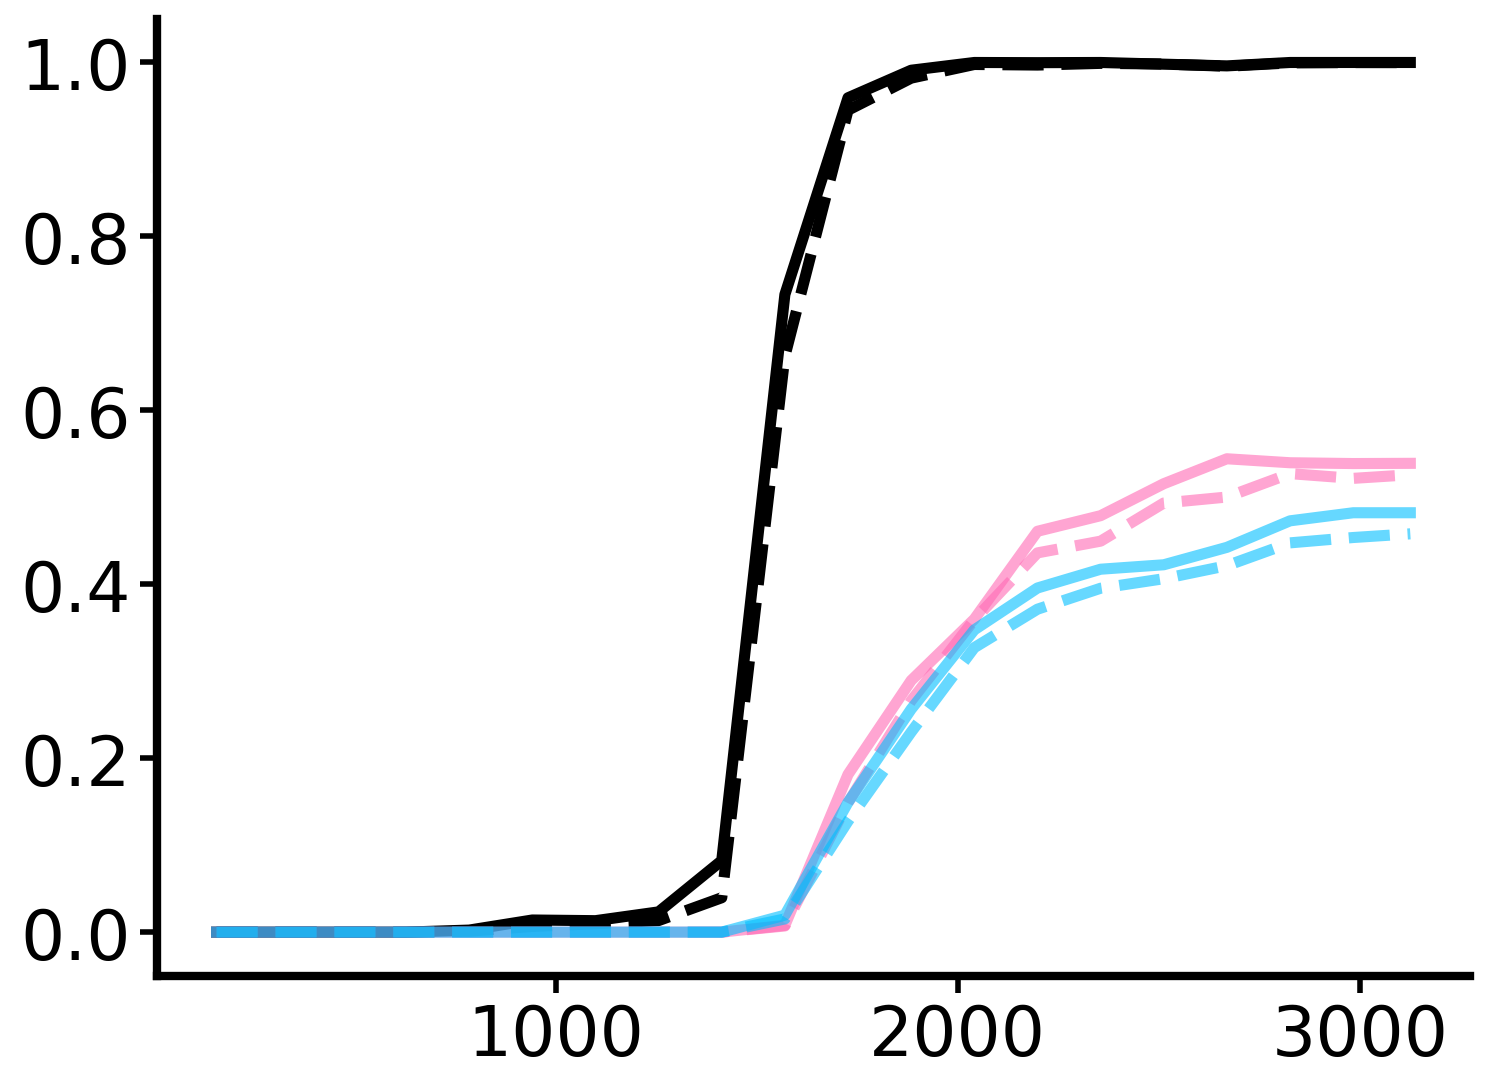

In [29]:
fig=plt.figure(dpi=200)
ax=fig.add_subplot(111)
i_show_solid=0
i_show_dashed=5
ax.plot(sft_steps,sft_train_corrects.mean(axis=-1)[:,i_show_solid],c="k",ls="-",lw=lw)
ax.plot(sft_steps,sft_train_corrects.mean(axis=-1)[:,i_show_dashed],c="k",ls="--",lw=lw)
ax.plot(sft_steps,sft_train_rl_corrects.mean(axis=-1)[:,i_show_solid],c=niceplots.color_1,ls="-",lw=lw)
ax.plot(sft_steps,sft_train_rl_corrects.mean(axis=-1)[:,i_show_dashed],c=niceplots.color_1,ls="--",lw=lw)
ax.plot(sft_steps,sft_test_corrects.mean(axis=-1)[:,i_show_solid],c=niceplots.color_2,ls="-",lw=lw)
ax.plot(sft_steps,sft_test_corrects.mean(axis=-1)[:,i_show_dashed],c=niceplots.color_2,ls="--",lw=lw)
temperature_solid=temperatures[i_show_solid]
temperature_dashed=temperatures[i_show_dashed]

niceplots.apply_plot_style2(fig, ax,lw=3,labelsize=25, tick_length=6, tick_width=2)
plt.tight_layout()
plt.savefig(os.path.join(figdir,prefix+f"_sft_dynamics_Ts={temperature_solid}_Td={temperature_dashed}.png"),dpi=200)


In [30]:
rl_train_corrects=[]
rl_train_rl_corrects=[]
rl_test_corrects=[]
for rl_ckpt in rl_ckpts:
    rl_eval_data=torch.load(rl_ckpt+"/eval_data_t.pt",weights_only=False)
    for temperature in temperatures:
        corrects_train=rl_eval_data["train"]['corrects_temp'][str(temperature)]
        corrects_train_rl=rl_eval_data["train_rl"]['corrects_temp'][str(temperature)]
        corrects_test=rl_eval_data["test"]['corrects_temp'][str(temperature)]
        rl_train_corrects.append(corrects_train.astype(np.float32).mean(-1))
        rl_train_rl_corrects.append(corrects_train_rl.astype(np.float32).mean(-1))
        rl_test_corrects.append(corrects_test.astype(np.float32).mean(-1))
rl_train_corrects=np.array(rl_train_corrects).reshape(rl_steps.shape[0],len(temperatures),-1)
rl_train_rl_corrects=np.array(rl_train_rl_corrects).reshape(rl_steps.shape[0],len(temperatures),-1)
rl_test_corrects=np.array(rl_test_corrects).reshape(rl_steps.shape[0],len(temperatures),-1)
rl_train_corrects.shape,rl_train_rl_corrects.shape,rl_test_corrects.shape

((30, 13, 512), (30, 13, 128), (30, 13, 512))

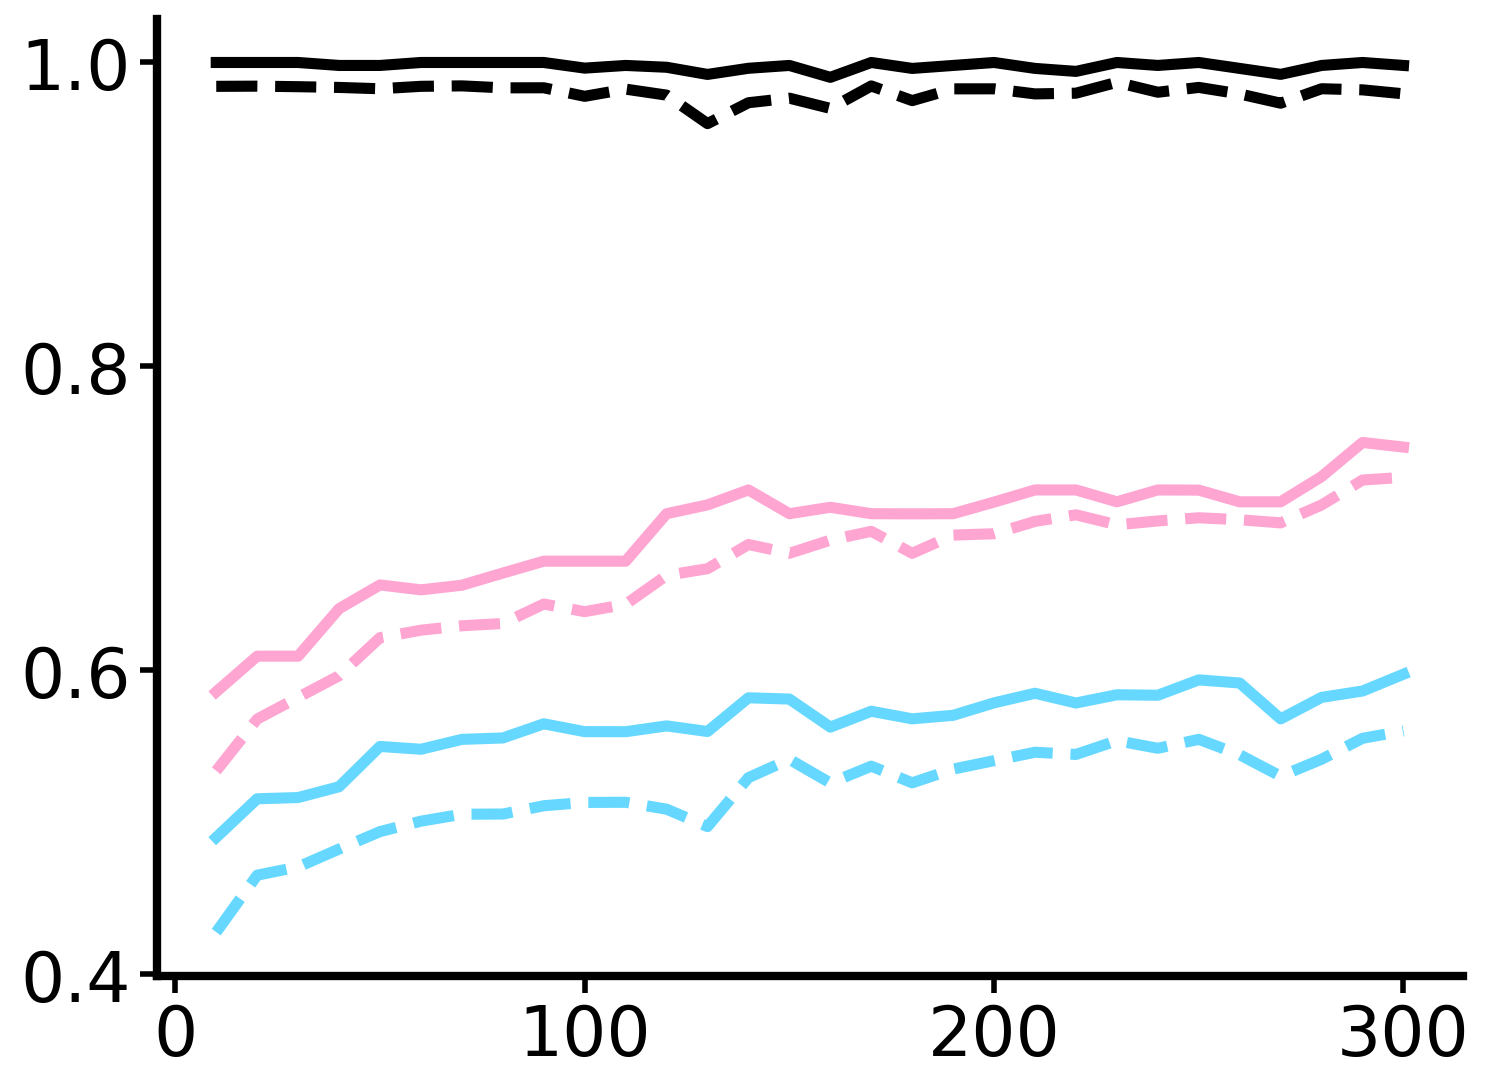

In [31]:
fig=plt.figure(dpi=200)
ax=fig.add_subplot(111)
i_show_solid=0
i_show_dashed=7
ax.plot(rl_steps,rl_train_corrects.mean(axis=-1)[:,i_show_solid],c="k",ls="-",lw=lw)
ax.plot(rl_steps,rl_train_corrects.mean(axis=-1)[:,i_show_dashed],c="k",ls="--",lw=lw)
ax.plot(rl_steps,rl_train_rl_corrects.mean(axis=-1)[:,i_show_solid],c=niceplots.color_1,ls="-",lw=lw)
ax.plot(rl_steps,rl_train_rl_corrects.mean(axis=-1)[:,i_show_dashed],c=niceplots.color_1,ls="--",lw=lw)
ax.plot(rl_steps,rl_test_corrects.mean(axis=-1)[:,i_show_solid],c=niceplots.color_2,ls="-",lw=lw)
ax.plot(rl_steps,rl_test_corrects.mean(axis=-1)[:,i_show_dashed],c=niceplots.color_2,ls="--",lw=lw)
temperature_solid=temperatures[i_show_solid]
temperature_dashed=temperatures[i_show_dashed]

niceplots.apply_plot_style2(fig, ax,lw=3,labelsize=25, tick_length=6, tick_width=2)
plt.tight_layout()
plt.savefig(os.path.join(figdir,prefix+f"_rl_dynamics_Ts={temperature_solid}_Td={temperature_dashed}.png"),dpi=200)

In [38]:
eval_data_pre_rl=torch.load(sft_ckpts[-1]+"/eval_data_t.pt",weights_only=False)
eval_data_post_rl=torch.load(rl_ckpts[-1]+"/eval_data_t.pt",weights_only=False)
solve_probs_pre_rl_train=[]
solve_probs_pre_rl_train_rl=[]
solve_probs_pre_rl_test=[]
solve_probs_post_rl_train=[]
solve_probs_post_rl_train_rl=[]
solve_probs_post_rl_test=[]

for temperature in temperatures:
    corrects_pre_rl_train=eval_data_pre_rl["train"]['corrects_temp'][str(temperature)]
    corrects_pre_rl_train_rl=eval_data_pre_rl["train_rl"]['corrects_temp'][str(temperature)]
    corrects_pre_rl_test=eval_data_pre_rl["test"]['corrects_temp'][str(temperature)]
    corrects_post_rl_train=eval_data_post_rl["train"]['corrects_temp'][str(temperature)]
    corrects_post_rl_train_rl=eval_data_post_rl["train_rl"]['corrects_temp'][str(temperature)]
    corrects_post_rl_test=eval_data_post_rl["test"]['corrects_temp'][str(temperature)]
    solve_probs_pre_rl_train.append(corrects_pre_rl_train.astype(np.float32).mean(-1))
    solve_probs_pre_rl_train_rl.append(corrects_pre_rl_train_rl.astype(np.float32).mean(-1))
    solve_probs_pre_rl_test.append(corrects_pre_rl_test.astype(np.float32).mean(-1))
    solve_probs_post_rl_train.append(corrects_post_rl_train.astype(np.float32).mean(-1))
    solve_probs_post_rl_train_rl.append(corrects_post_rl_train_rl.astype(np.float32).mean(-1))
    solve_probs_post_rl_test.append(corrects_post_rl_test.astype(np.float32).mean(-1))
solve_probs_pre_rl_train=np.stack(solve_probs_pre_rl_train,axis=0)
solve_probs_pre_rl_train_rl=np.stack(solve_probs_pre_rl_train_rl,axis=0)
solve_probs_pre_rl_test=np.stack(solve_probs_pre_rl_test,axis=0)
solve_probs_post_rl_train=np.stack(solve_probs_post_rl_train,axis=0)
solve_probs_post_rl_train_rl=np.stack(solve_probs_post_rl_train_rl,axis=0)
solve_probs_post_rl_test=np.stack(solve_probs_post_rl_test,axis=0)
x_train=np.linspace(0,1,solve_probs_pre_rl_train.shape[1])
x_train_rl=np.linspace(0,1,solve_probs_pre_rl_train_rl.shape[1])
x_test=np.linspace(0,1,solve_probs_pre_rl_test.shape[1])
solve_probs_pre_rl_train.shape,solve_probs_pre_rl_train_rl.shape,solve_probs_pre_rl_test.shape,solve_probs_post_rl_train.shape,solve_probs_post_rl_train_rl.shape,solve_probs_post_rl_test.shape


((13, 512), (13, 128), (13, 512), (13, 512), (13, 128), (13, 512))

[0.025, 0.1, 0.4, 0.8, 1.2, 1.4]


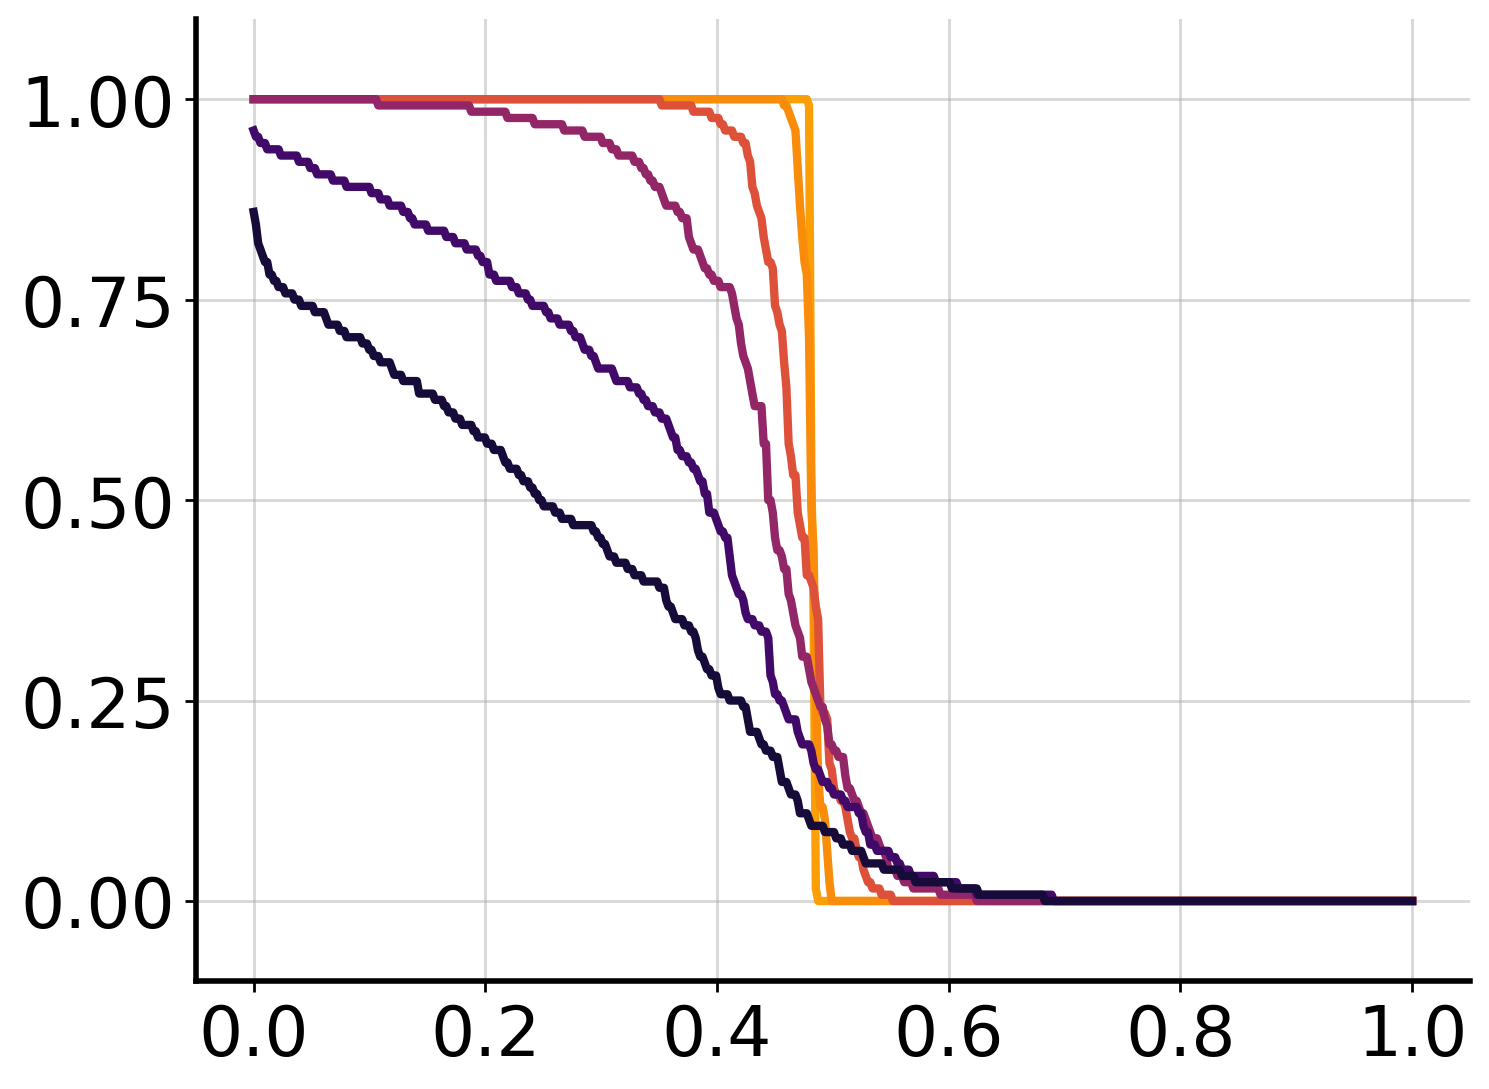

In [101]:
i_temp_plots=[0,2,4,6,8,9]
print([temperatures[i] for i in i_temp_plots])
#assign colors by log-temperature
mincol=0.2
maxcol=1.0
colors = plt.cm.inferno_r(mincol + (maxcol - mincol) * temperatures/1.6)

fig=plt.figure(dpi=200)
ax=fig.add_subplot(111)
for i_temp in i_temp_plots:
    ax.plot(x_test,np.sort(solve_probs_pre_rl_test[i_temp])[::-1],color=colors[i_temp],lw=3)
ax.set_ylim(-0.1,1.1)

niceplots.apply_plot_style2(fig, ax,lw=2,labelsize=25, tick_length=4, tick_width=1)
plt.tight_layout()
#add grid
ax.grid(True,linestyle="-",alpha=0.5,linewidth=1.0)
plt.savefig(os.path.join(figdir,prefix+f"_pre_rl_test.png"),dpi=200)

In [106]:
(solve_probs_pre_rl_test>(2/128)).astype(np.float32).mean(-1).max(),(solve_probs_post_rl_test>(2/128)).astype(np.float32).mean(-1).max()

(0.6074219, 0.6875)

[0.025, 0.1, 0.4, 0.8, 1.2, 1.4]
Max Pass@1 of Pre-RL:  0.48223877
Max Pass@128 of Pre-RL:  0.6894531
Max Pass@1 of Post-RL:  0.5975189
Max Pass@128 of Post-RL:  0.7421875


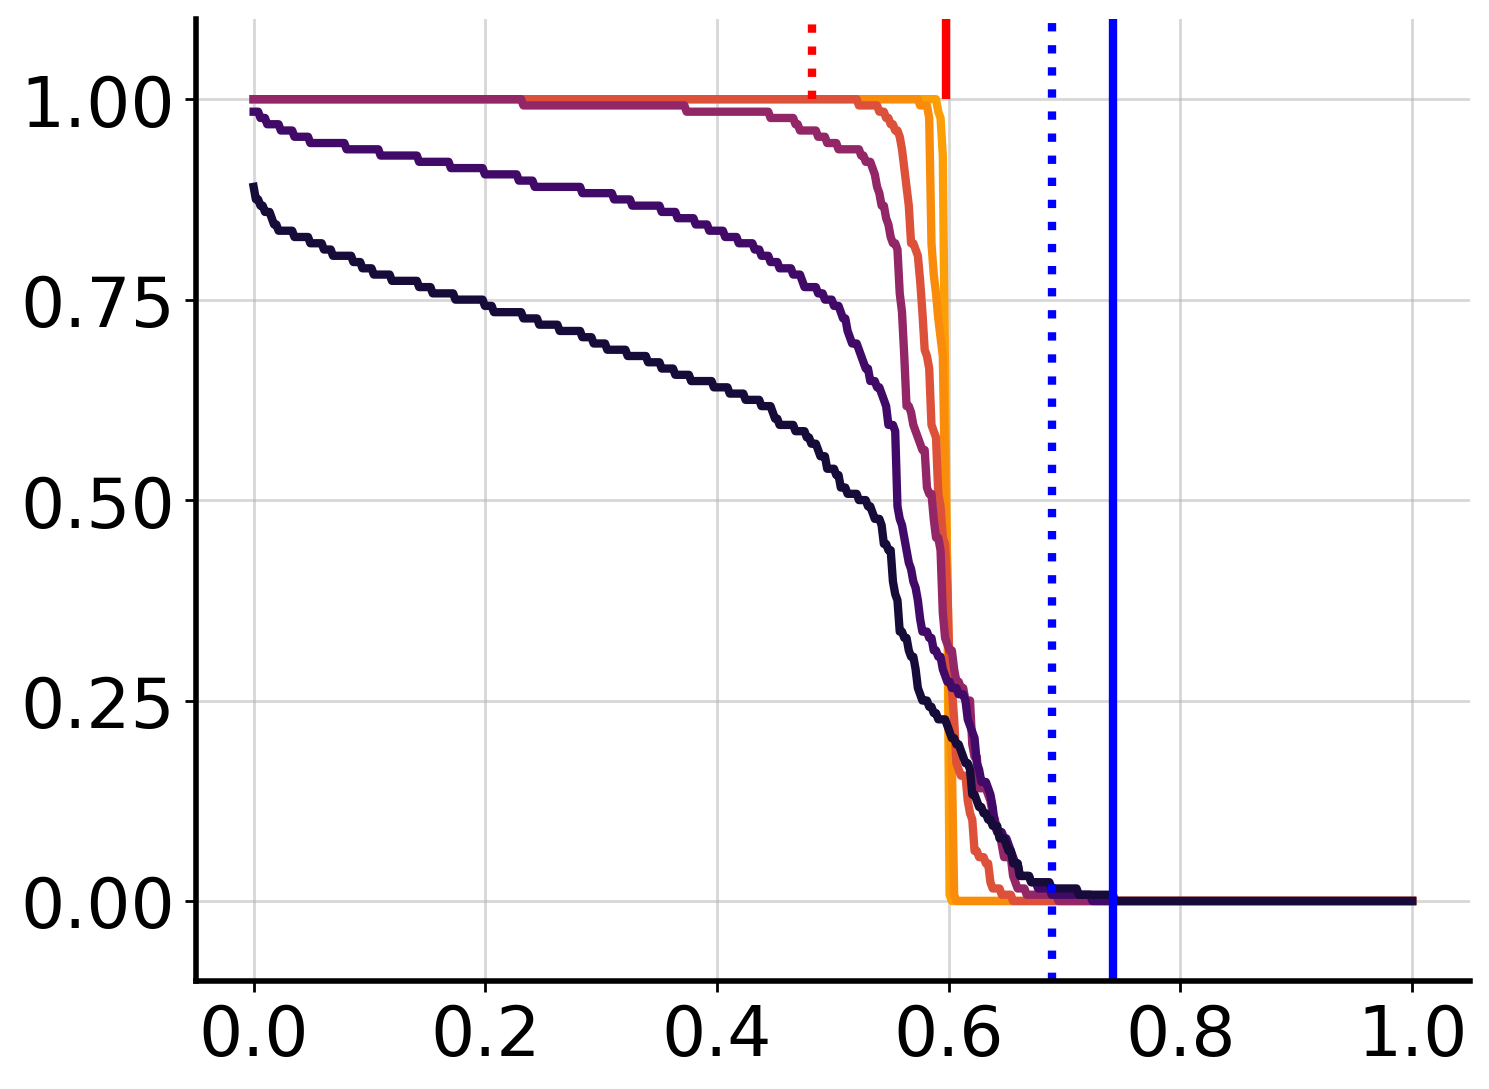

In [111]:
i_temp_plots=[0,2,4,6,8,9]
print([temperatures[i] for i in i_temp_plots])
#assign colors by log-temperature
mincol=0.2
maxcol=1.0
colors = plt.cm.inferno_r(mincol + (maxcol - mincol) * temperatures/1.6)

fig=plt.figure(dpi=200)
ax=fig.add_subplot(111)
for i_temp in i_temp_plots:
    ax.plot(x_test,np.sort(solve_probs_post_rl_test[i_temp])[::-1],color=colors[i_temp],lw=3)
ax.set_ylim(-0.1,1.1)

max_acc_pre_rl=np.max(solve_probs_pre_rl_test.mean(-1))
ax.vlines(max_acc_pre_rl,1.0,1.1,color="r",ls=":",lw=3,label="Max Pass@1 of Pre-RL")
print("Max Pass@1 of Pre-RL: ",max_acc_pre_rl)
max_coverage_pre_rl=np.max((solve_probs_pre_rl_test>0).astype(np.float32).mean(-1))
ax.axvline(max_coverage_pre_rl,color="b",ls=":",lw=3)
print("Max Pass@128 of Pre-RL: ",max_coverage_pre_rl)

max_acc_post_rl=np.max(solve_probs_post_rl_test.mean(-1))
ax.vlines(max_acc_post_rl,1.0,1.1,color="r",ls="-",lw=3,label="Max Pass@1 of Post-RL")
print("Max Pass@1 of Post-RL: ",max_acc_post_rl)
max_coverage_post_rl=np.max((solve_probs_post_rl_test>0).astype(np.float32).mean(-1))
ax.axvline(max_coverage_post_rl,color="b",ls="-",lw=3)
print("Max Pass@128 of Post-RL: ",max_coverage_post_rl)

niceplots.apply_plot_style2(fig, ax,lw=2,labelsize=25, tick_length=4, tick_width=1)
plt.tight_layout()
#add grid
ax.grid(True,linestyle="-",alpha=0.5,linewidth=1.0)
plt.savefig(os.path.join(figdir,prefix+f"_post_rl_test.png"),dpi=200)

In [112]:
solve_probs_pre_rl_train_rl.shape,solve_probs_pre_rl_test.shape,solve_probs_post_rl_train_rl.shape,solve_probs_post_rl_test.shape

((13, 128), (13, 512), (13, 128), (13, 512))

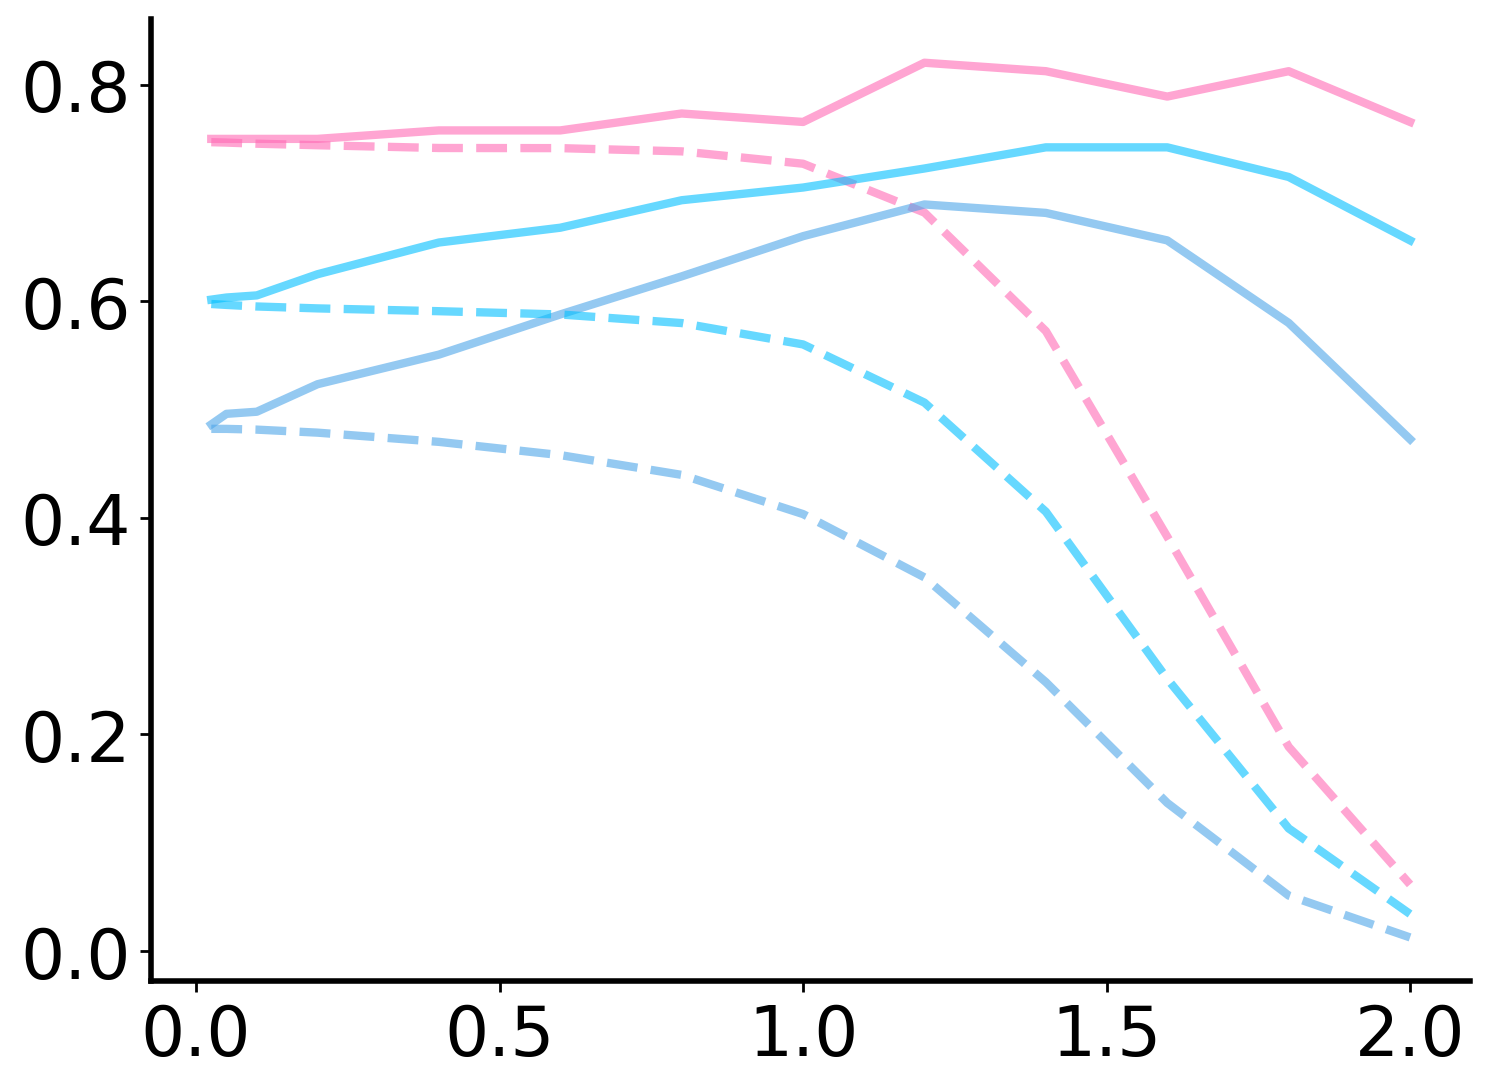

In [ ]:
p1_pre_rl_train_rl=solve_probs_pre_rl_train_rl.mean(-1)
p128_pre_rl_train_rl=(solve_probs_pre_rl_train_rl>0).astype(np.float32).mean(-1)
p1_pre_rl_test=solve_probs_pre_rl_test.mean(-1)
p128_pre_rl_test=(solve_probs_pre_rl_test>0).astype(np.float32).mean(-1)
p1_post_rl_train_rl=solve_probs_post_rl_train_rl.mean(-1)
p128_post_rl_train_rl=(solve_probs_post_rl_train_rl>0).astype(np.float32).mean(-1)
p1_post_rl_test=solve_probs_post_rl_test.mean(-1)
p128_post_rl_test=(solve_probs_post_rl_test>0).astype(np.float32).mean(-1)

fig=plt.figure(dpi=200)
ax=fig.add_subplot(111)
#ax.plot(temperatures,p1_pre_rl_train_rl,label="Pre-RL Train RL")
#ax.plot(temperatures,p128_pre_rl_train_rl,label="Pre-RL Train RL")
ax.plot(temperatures,p1_post_rl_train_rl,label="Post-RL Train RL",ls="--",lw=lw,color=niceplots.color_1)
ax.plot(temperatures,p128_post_rl_train_rl,label="Post-RL Train RL",ls="-",lw=3,color=niceplots.color_1)

ax.plot(temperatures,p1_pre_rl_test,label="Pre-RL Test",ls="--",lw=3,color=0.7*niceplots.color_2+0.3*niceplots.color_1)
ax.plot(temperatures,p128_pre_rl_test,label="Pre-RL Test",ls="-",lw=3,color=0.7*niceplots.color_2+0.3*niceplots.color_1)
ax.plot(temperatures,p1_post_rl_test,label="Post-RL Test",ls="--",lw=3,color=niceplots.color_2)
ax.plot(temperatures,p128_post_rl_test,label="Post-RL Test",ls="-",lw=3,color=niceplots.color_2)

niceplots.apply_plot_style2(fig, ax,lw=2,labelsize=25, tick_length=4, tick_width=1)
plt.tight_layout()
plt.savefig(os.path.join(figdir,prefix+f"_temp_vs_pass.png"),dpi=200)


In [109]:
0.7421875-0.6894531

0.05273439999999996

In [136]:
ckpt_path_pre_rl="./data/sft/v6/toy-multistep-v6-1/checkpoint-3125/"
#ckpt_path_pre_rl="./data/sft/v5/toy-multistep-v5-4/checkpoint-6250/"
#ckpt_path_pre_rl="./data/rl/v5_2/checkpoint-300/"

#temperatures=[0.025,0.05,0.1,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0]
temperatures=[0.05,0.4,1.0,1.2]
eval_data_pre_rl=torch.load(ckpt_path_pre_rl+"/eval_data_t.pt",weights_only=False)
solve_probs_pre_rl_train_rl=[]
solve_probs_pre_rl_test=[]
for temperature in temperatures:
    #corrects_pre_rl_train_rl=eval_data_pre_rl["train_rl"]['corrects_temp'][str(temperature)]
    corrects_pre_rl_test=eval_data_pre_rl["test"]['corrects_temp'][str(temperature)]
    solve_probs_pre_rl_train_rl.append(corrects_pre_rl_train_rl.astype(np.float32).mean(-1))
    solve_probs_pre_rl_test.append(corrects_pre_rl_test.astype(np.float32).mean(-1))
solve_probs_pre_rl_train_rl=np.stack(solve_probs_pre_rl_train_rl,axis=0)
solve_probs_pre_rl_test=np.stack(solve_probs_pre_rl_test,axis=0)
solve_probs_pre_rl_train_rl.shape,solve_probs_pre_rl_test.shape

((4, 128), (4, 512))

Test Temperature:  0.05 pass@1:  0.22969055 pass@128:  0.23046875
Test Temperature:  0.4 pass@1:  0.22763062 pass@128:  0.27539062
Test Temperature:  1.0 pass@1:  0.19412231 pass@128:  0.33203125
Test Temperature:  1.2 pass@1:  0.15756226 pass@128:  0.34375


(-0.1, 1.1)

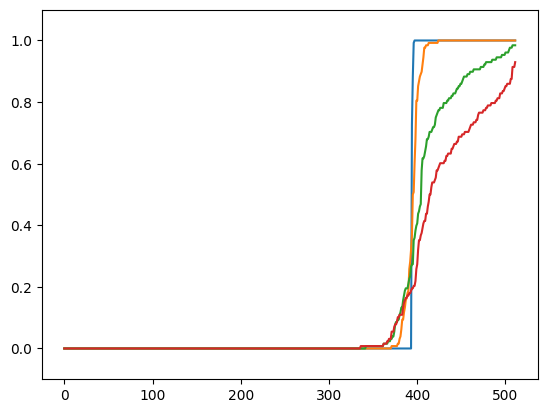

In [138]:
for i_temp, temperature in enumerate(temperatures):
   # plt.plot(np.sort(solve_probs_pre_rl_train_rl[i_temp]))
    plt.plot(np.sort(solve_probs_pre_rl_test[i_temp]))
    #print("Train RL Temperature: ",temperature,"pass@1: ",solve_probs_pre_rl_train_rl[i_temp].mean(),"pass@128: ",(solve_probs_pre_rl_train_rl[i_temp]>0).astype(np.float32).mean())
    print("Test Temperature: ",temperature,"pass@1: ",solve_probs_pre_rl_test[i_temp].mean(),"pass@128: ",(solve_probs_pre_rl_test[i_temp]>0).astype(np.float32).mean())
plt.ylim(-0.1,1.1)

In [ ]:
accs=[]
ckpt_paths=glob.glob("./data/sft/v3/toy-multistep-v4-1/checkpoint-*")
keys=["train",
                    "train_rl_nm0","train_rl_nm1","train_rl_nm2","train_rl_nm3","train_rl_nm4",
                    "test_nm0","test_nm1","test_nm2","test_nm3","test_nm4"]
ckpt_paths.sort(key=lambda x: int(x.split("-")[-1]))
steps=[int(x.split("-")[-1]) for x in ckpt_paths]
for ckpt_path in tqdm.tqdm(ckpt_paths):
    eval_data=torch.load(ckpt_path+"/eval_data.pt",weights_only=False)
    for key in keys:
        accs.append(eval_data[key]["corrects_t0"].mean())
accs=np.array(accs).reshape(-1,len(keys))
print(accs.shape)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:01<00:00,  6.13it/s]

(10, 11)


Text(0, 0.5, 'Accuracy')

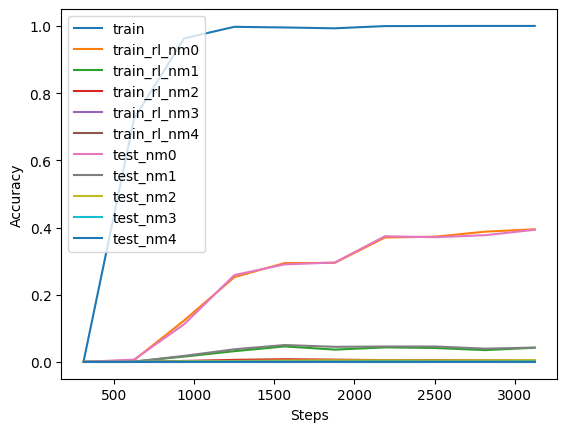

In [3]:
for i,key in enumerate(keys):
    plt.plot(steps,accs[:,i],label=key)
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Accuracy")

In [258]:
ckpt_path_pre_rl="./data/sft/v5/toy-multistep-v5-7/checkpoint-3125/"
ckpt_path_post_rl="./data/rl/v5_7/checkpoint-100"
temperatures=[0.025,0.05,0.1,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0]

#ckpt_path_pre_rl="./data/sft/v5/toy-multistep-v5-2/checkpoint-3125/"
#ckpt_path_post_rl="./data/rl/v5_2/checkpoint-300/"
#temperatures=[0.05,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0]

ckpt_path_pre_rl="./data/sft/v5/toy-multistep-v5-8/checkpoint-3125/"
ckpt_path_post_rl="./data/rl/v5_8/checkpoint-300/"
temperatures=[0.05,0.4,1.0,1.2,1.6,2.0]

#ckpt_path_pre_rl="./data/sft/v6/toy-multistep-v6-1/checkpoint-3125/"
#ckpt_path_post_rl="./data/rl/v6_1/checkpoint-300/"
#temperatures=[0.05,0.4,1.0,1.2,1.6,2.0]

#ckpt_path_pre_rl="./data/sft/v5/toy-multistep-v5-4/checkpoint-6250"
#ckpt_path_post_rl="./data/rl/v5_4/checkpoint-300/"
#temperatures=[0.05,0.2,0.4,0.6,0.8,1.0,1.2,1.4]

In [259]:
eval_data_pre_rl=torch.load(ckpt_path_pre_rl+"/eval_data_t.pt",weights_only=False)
eval_data_post_rl=torch.load(ckpt_path_post_rl+"/eval_data_t.pt",weights_only=False)
solve_probs_pre_rl=[]
solve_probs_post_rl=[]
for temperature in temperatures:
    corrects=eval_data_pre_rl["test"]['corrects_temp'][str(temperature)]
    corrects_post_rl=eval_data_post_rl["test"]['corrects_temp'][str(temperature)]
    solve_probs_pre_rl.append(corrects.astype(np.float32).mean(-1))
    solve_probs_post_rl.append(corrects_post_rl.astype(np.float32).mean(-1))
solve_probs_pre_rl=np.stack(solve_probs_pre_rl,axis=0)
solve_probs_post_rl=np.stack(solve_probs_post_rl,axis=0)
solve_probs_pre_rl.shape,solve_probs_post_rl.shape

((6, 512), (6, 512))

(-0.1, 1.1)

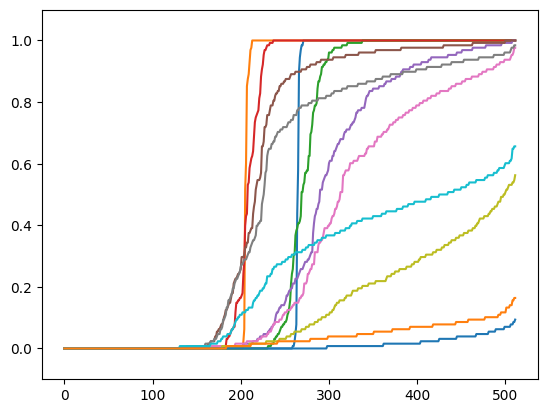

In [260]:
for i_temp, temperature in enumerate(temperatures):
    plt.plot(np.sort(solve_probs_pre_rl[i_temp]))
    plt.plot(np.sort(solve_probs_post_rl[i_temp]))
plt.ylim(-0.1,1.1)

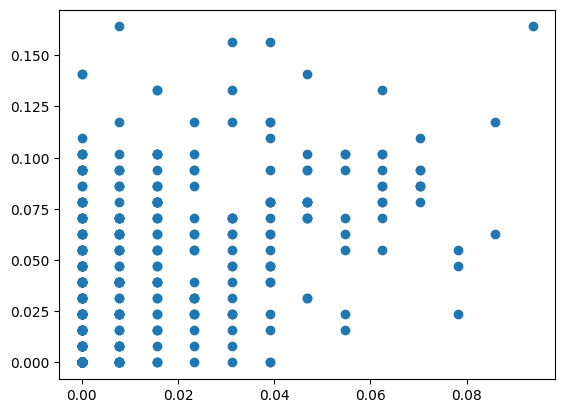

In [261]:
plt.scatter(solve_probs_pre_rl[-1],solve_probs_post_rl[-1])

In [262]:
acc_pre_rl=[]
acc_post_rl=[]
coverage_pre_rl=[]
coverage_post_rl=[]
for i_temp, temperature in enumerate(temperatures):
    acc_pre_rl.append(solve_probs_pre_rl[i_temp].mean())
    acc_post_rl.append(solve_probs_post_rl[i_temp].mean())
    coverage_pre_rl.append((solve_probs_pre_rl[i_temp]>0).astype(np.float32).mean(-1))
    coverage_post_rl.append((solve_probs_post_rl[i_temp]>0).astype(np.float32).mean(-1))
acc_pre_rl=np.array(acc_pre_rl)
acc_post_rl=np.array(acc_post_rl)
coverage_pre_rl=np.array(coverage_pre_rl)
coverage_post_rl=np.array(coverage_post_rl)
acc_pre_rl.shape,acc_post_rl.shape,coverage_pre_rl.shape,coverage_post_rl.shape

((6,), (6,), (6,), (6,))

Text(0.5, 1.0, 'Accuracy and Coverage of Pre-RL and Post-RL')

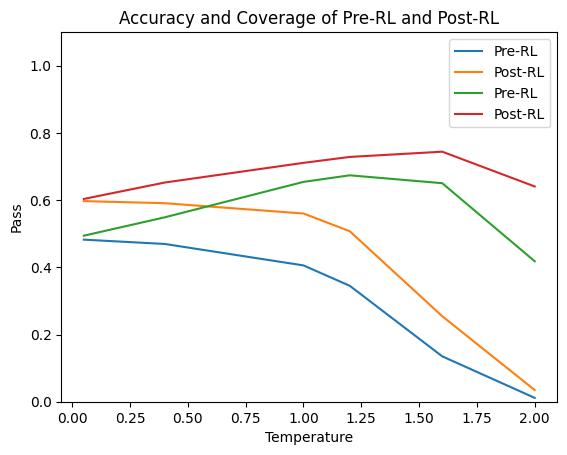

In [263]:
plt.plot(temperatures,acc_pre_rl,label="Pre-RL")
plt.plot(temperatures,acc_post_rl,label="Post-RL")
plt.plot(temperatures,coverage_pre_rl,label="Pre-RL")
plt.plot(temperatures,coverage_post_rl,label="Post-RL")
plt.ylim(0,1.1)
plt.legend()
plt.xlabel("Temperature")
plt.ylabel("Pass")
plt.title("Accuracy and Coverage of Pre-RL and Post-RL")

In [265]:
ckpt_path_pre_rl="./data/sft/v5/toy-multistep-v5-8/checkpoint-3125/"
ckpt_path_post_rl="./data/rl/v5_8/checkpoint-300/"
temperatures=[0.025,0.05,0.1,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0]

eval_data_pre_rl=torch.load(ckpt_path_pre_rl+"/eval_data_t.pt",weights_only=False)
eval_data_post_rl=torch.load(ckpt_path_post_rl+"/eval_data_t.pt",weights_only=False)

pre_train_rl=[]
pre_test=[]
post_train_rl=[]
post_test=[]
for temperature in temperatures:
    pre_train_rl.append(eval_data_pre_rl["test"]['corrects_temp'][str(temperature)].mean(-1))
    pre_test.append(eval_data_pre_rl["test"]['corrects_temp'][str(temperature)].mean(-1))
    post_train_rl.append(eval_data_post_rl["test"]['corrects_temp'][str(temperature)].mean(-1))
    post_test.append(eval_data_post_rl["test"]['corrects_temp'][str(temperature)].mean(-1))
pre_train_rl=np.array(pre_train_rl)
pre_test=np.array(pre_test)
post_train_rl=np.array(post_train_rl)
post_test=np.array(post_test)
x_train_rl=np.linspace(0,1,pre_train_rl.shape[1])
x_test=np.linspace(0,1,pre_test.shape[1])
pre_train_rl.shape,pre_test.shape,post_train_rl.shape,post_test.shape

KeyError: '0.025'

In [266]:
colors = plt.cm.plasma(np.linspace(0, 1, len(temperatures)))
for i_temp, temperature in enumerate(temperatures):
    if i_temp%2!=0:
        continue
    plt.plot(x_test,np.sort(pre_test[i_temp])[::-1],color=colors[i_temp],label="Pre-RL Temperature: "+str(temperature))

IndexError: list index out of range

In [ ]:
plt.plot(x_train_rl,np.sort(post_train_rl[3])[::-1],label="RL Train Post-RL")
plt.plot(x_test,np.sort(post_test[3])[::-1],label="RL Test Post-RL")
plt.legend()
plt.xlabel("Temperature")
plt.ylabel("Accuracy")
plt.title("Accuracy of Pre-RL and Post-RL")


In [158]:
pre_train_rl.shape

(6,)

In [ ]:
def plot_solving_probs_temp_covg(model_names, temperatures, dataset_name, seed, image_name, model_n, train_data, eval_data):
    # get all the solving probs 
    alldata = {}
    for model_name in model_names:
        for temperature in temperatures:
            filepath = f"/n/home05/sqin/wall/verl/eval/data/{model_name}/{dataset_name}/temp={temperature}_seed={seed}/data.json"
            solving_probs = compute_solving_probs(filepath)
            alldata[f"{model_name}_T={temperature}"] = {
                "probs": solving_probs,
                "pass@64": np.mean(solving_probs>0.0),
            }
    
    # plotting
    # Set style
    sns.set_theme(style="whitegrid", context="talk")

    # Temperatures to plot
    n_temps = len(temperatures)

    # Prepare trimmed colormap (avoid white part at the top of 'hot')
    base_cmap = plt.get_cmap("gist_heat_r")
    trimmed_colors = base_cmap(np.linspace(0.25, 1.0, n_temps))  # cut off the brightest

    fig = plt.figure(figsize=(18, 5))
    gs = gridspec.GridSpec(1, 4, width_ratios=[1.5, 5, 5, 5])  # left panel is wider
 
    # Left column: metadata text
    ax_text = fig.add_subplot(gs[0])
    ax_text.axis("off")
    info_text = (
        f"Model: {model_n}\n"
        f"Train: {train_data}\n"
        f"Eval: {eval_data}"
    )

    ax_text.text(0, 0.5, info_text, fontsize=16, va='center', ha='left', linespacing=1.5)

    axes = [fig.add_subplot(gs[i]) for i in range(1, 4)]
    for ax, model in zip(axes, model_names):
        for i, T in enumerate(temperatures):
            solve_probs = alldata[f"{model}_T={T}"]['probs']
            x = np.arange(len(solve_probs))
            ax.plot(x, np.sort(solve_probs)[::-1], label=f"T={T}", color=trimmed_colors[i])

        ax.set_xlabel("Self-Ranking Index")
        ax.set_title("Post-GRPO" if "GRPO" in model.upper() else "Pre-GRPO")
        ax.set_ylim([-0.02, 1.02])
        ax.tick_params(labelsize=12)

    axes[0].set_ylabel("Correct Rate@64", fontsize=14)
    axes[1].legend(title="Temperature", fontsize=10)

    # on the third subplot, plot number of problems sovled with best-of-k sampling
    ax = axes[2]
    pre_grpo_num_solved = []
    post_grpo_num_solved = []   
    for i, T in enumerate(temperatures):
        num_solved = alldata[f"{model_names[0]}_T={T}"]["pass@64"]*len(solve_probs)
        pre_grpo_num_solved.append(num_solved)
        
        num_solved = alldata[f"{model_names[1]}_T={T}"]["pass@64"]*len(solve_probs)
        post_grpo_num_solved.append(num_solved)


    ax.plot(temperatures, pre_grpo_num_solved, marker="o", label="Pre-GRPO")
    ax.plot(temperatures, post_grpo_num_solved, marker="o", label="Post-GRPO")
    ax.axhline(y=np.max(pre_grpo_num_solved), color="C0", linestyle="--")
    ax.axhline(y=np.max(post_grpo_num_solved), color="C1", linestyle="--")

    ax.set_xlabel("Temperature")
    ax.set_ylabel("# of Problems Solved")
    ax.set_ylim([None, len(solve_probs)])
    ax.set_xlim([-0.1, 1.3])
    ax.set_title("Best-of-N, N=64")
    ax.legend(title="Model", fontsize=10)

    plt.tight_layout()
    plt.savefig(f"{image_name}.pdf", bbox_inches='tight')

    return

In [ ]:
def plot_solving_probs(pre_grpo_solve_probs, pre_grpo_std_probs, post_grpo_solve_probs, post_grpo_std_probs, image_name):
    """
    Plot the solving probabilities before and after GRPO.
    """
    # Calculate difference and error
    # Compute difference and propagated std
    delta = post_grpo_solve_probs - pre_grpo_solve_probs
    delta_std = np.sqrt(post_grpo_std_probs**2 + pre_grpo_std_probs**2)

    # Sort by pre-GRPO accuracy (descending)
    sort_idx = np.argsort(pre_grpo_solve_probs)[::-1]
    delta_sorted = delta[sort_idx]
    delta_std_sorted = delta_std[sort_idx]
    pre_sorted = pre_grpo_solve_probs[sort_idx]
    pre_std_sorted = pre_grpo_std_probs[sort_idx]

    x = np.arange(len(delta_sorted))

    # Plot setup
    sns.set_theme(style="whitegrid", context="talk")
    plt.rcParams['axes.grid'] = False
    fig, ax1 = plt.subplots(figsize=(8, 6))

    # Primary Y-axis: Δ Post - Pre
    ax1.errorbar(
        x, delta_sorted, yerr=delta_std_sorted,
        fmt='o', color='tab:blue', ecolor='gray',
        elinewidth=1, capsize=3, label="Δ Pass@64 (Post - Pre)",
        markersize=2
    )
    ax1.axhline(0, linestyle='--', color='black', linewidth=1)
    ax1.set_xlabel("Problem Index (sorted by Pre-GRPO accuracy)", fontsize=14)
    ax1.set_ylabel("Δ Pass@64 Rate", fontsize=14, color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.tick_params(axis='x', labelsize=12)

    # Secondary Y-axis: Pre-GRPO accuracy with shaded error band
    ax2 = ax1.twinx()
    ax2.plot(x, pre_sorted, color='tab:red', label="Pre-GRPO Pass@64", linewidth=2)
    ax2.fill_between(x, pre_sorted - pre_std_sorted, pre_sorted + pre_std_sorted,
                    color='tab:red', alpha=0.2)
    ax2.set_ylabel("Pre-GRPO Pass@64 Rate", fontsize=14, color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Legends
    ax1.legend(loc='upper left', fontsize=11)
    ax2.legend(loc='upper right', fontsize=11)

    if "train" in image_name:
        plt.title("MATH (train subset)", fontsize=16)
    elif "test" in image_name:
        plt.title("MATH-500 (test)", fontsize=16)
    else:
        pass
    plt.tight_layout()
    plt.savefig(image_name, bbox_inches="tight")

    return

Text(0, 0.5, 'Accuracy')

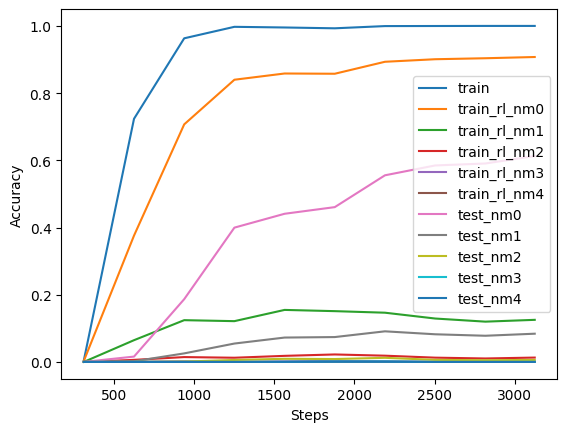

In [4]:
for i,key in enumerate(keys):
    plt.plot(steps,accs[:,i],label=key)
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Accuracy")

In [27]:
eval_data=torch.load(ckpt_paths[2]+"/eval_data.pt",weights_only=False)

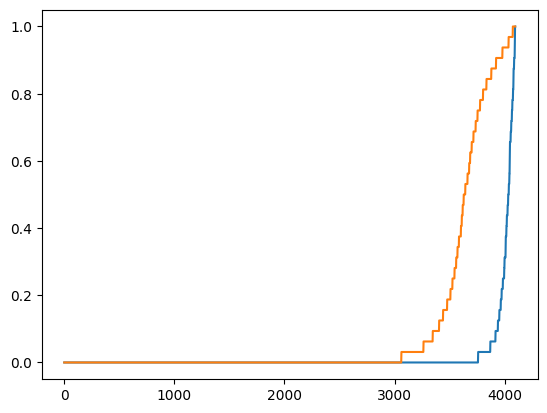

In [29]:
corrects=eval_data["test_nm1"]['corrects_t1']
probs=corrects.astype(np.float32).mean(axis=1)
plt.plot(np.sort(probs))

corrects=eval_data["train_rl_nm1"]['corrects_t1']
probs=corrects.astype(np.float32).mean(axis=1)
plt.plot(np.sort(probs))

Text(0.5, 1.0, 'p=0.90')

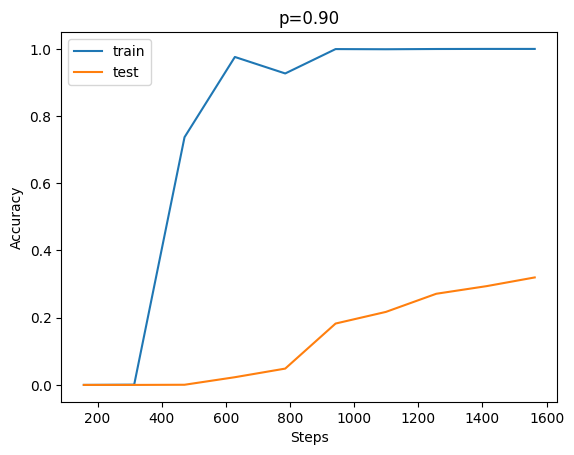

In [3]:
for i,key in enumerate(keys):
    plt.plot(steps,accs[:,i],label=key)
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Accuracy")
plt.title("p=0.90")



In [10]:
train_acc_t0_s

[0.814697265625, 0.231689453125]